In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using DifferentialEquations, StaticArrays, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function mem_fhn(u, p, t)
    x1, y1, x2, y2 = u
    ϵ, a, α, g, σ, k = p

    I(ϕ) = g / ( 1 + exp( k * ( cosd(σ/2) - cosd(ϕ - α - σ / 2) ) ) )

    ϕ2 = rad2deg(atan(y2, x2))
    dx1dt = (x1 - x1 ^ 3/ 3 - y1 + I(ϕ2)) / ϵ
    dy1dt = x1 - a

    ϕ1= rad2deg(atan(y1, x1))
    dx2dt = (x2 - x2 ^ 3/ 3 - y2 + I(ϕ1)) / ϵ
    dy2dt = x2 - a

    SVector(dx1dt, dy1dt, dx2dt, dy2dt)
end

function mem_fhn_get_params()
    ϵ = 0.01; a = -1.01; α = 210.0; g = 0.1; σ = 50.0; k = 50.0
    return [ϵ, a, α, g, σ, k]
end

mem_fhn_get_params (generic function with 1 method)

In [6]:
mem_params = mem_fhn_get_params();
mem_params[3] = 160.0
u0 = SVector(1, 0.8, 1.21, 1.0);
tspan = (0.0, 1500.0)

prob = ODEProblem(mem_fhn, u0, tspan, mem_params)
sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

In [8]:
sol[end]

4-element SVector{4, Float64} with indices SOneTo(4):
 -1.627581001433943
 -0.11019565302294007
 -1.9100702624162895
  0.5084871607867878

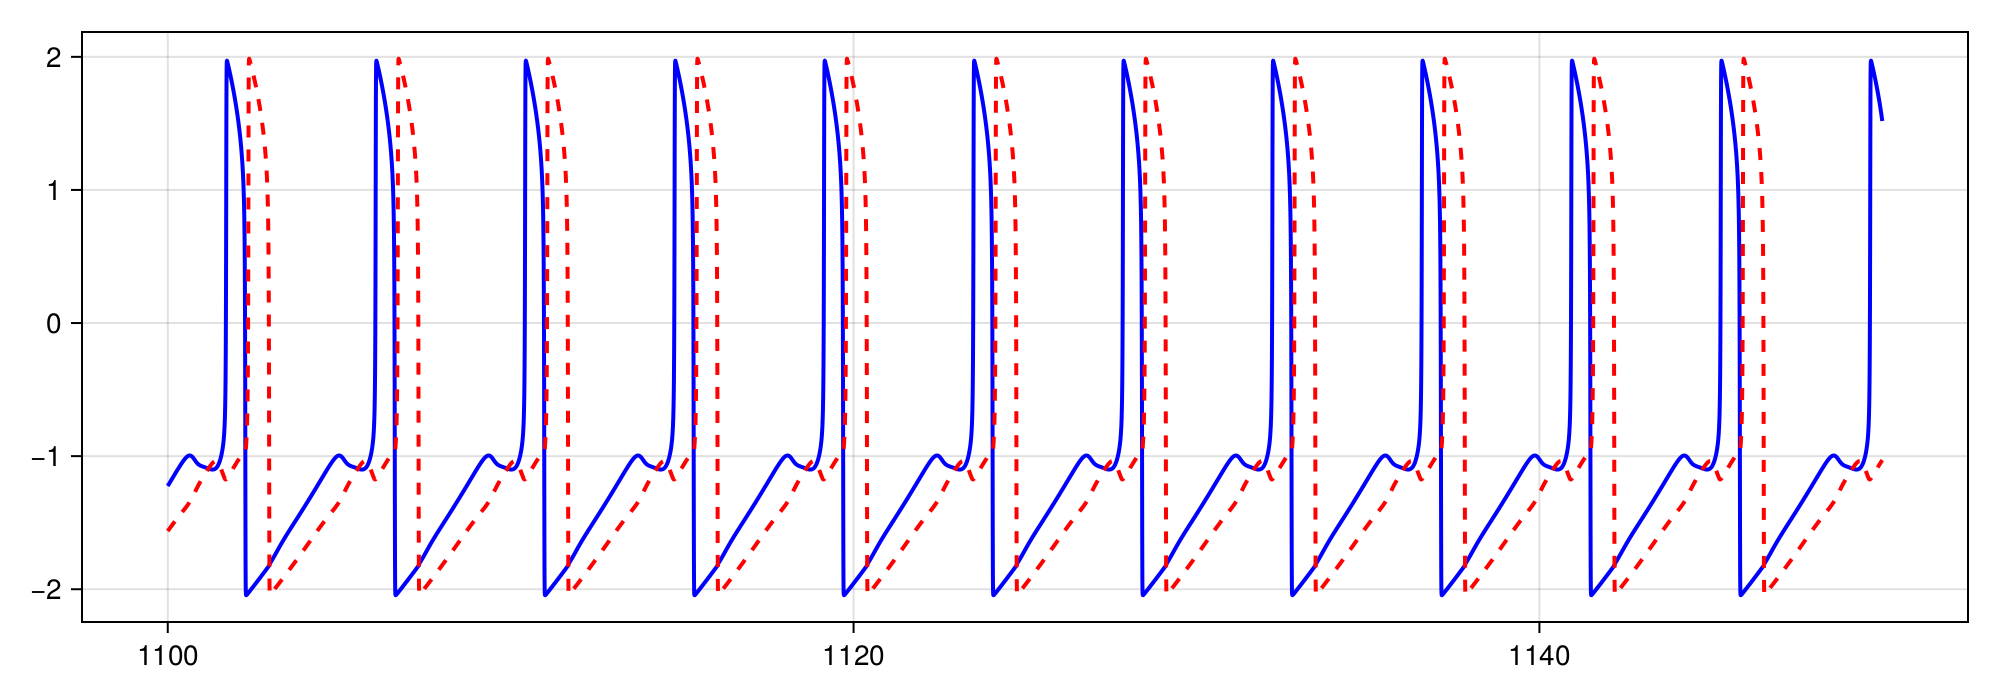

CairoMakie.Screen{IMAGE}


In [7]:
tstart = 1100000; tend = 1150000
f = Figure(size = (1000, 350))
ax = Axis(f[1, 1])
lines!(sol.t[tstart:tend], sol[1, tstart:tend], color = :blue, linewidth = 2.0)
lines!(sol.t[tstart:tend], sol[3, tstart:tend], color = :red, linewidth = 2.0, linestyle = :dash)
display(f)

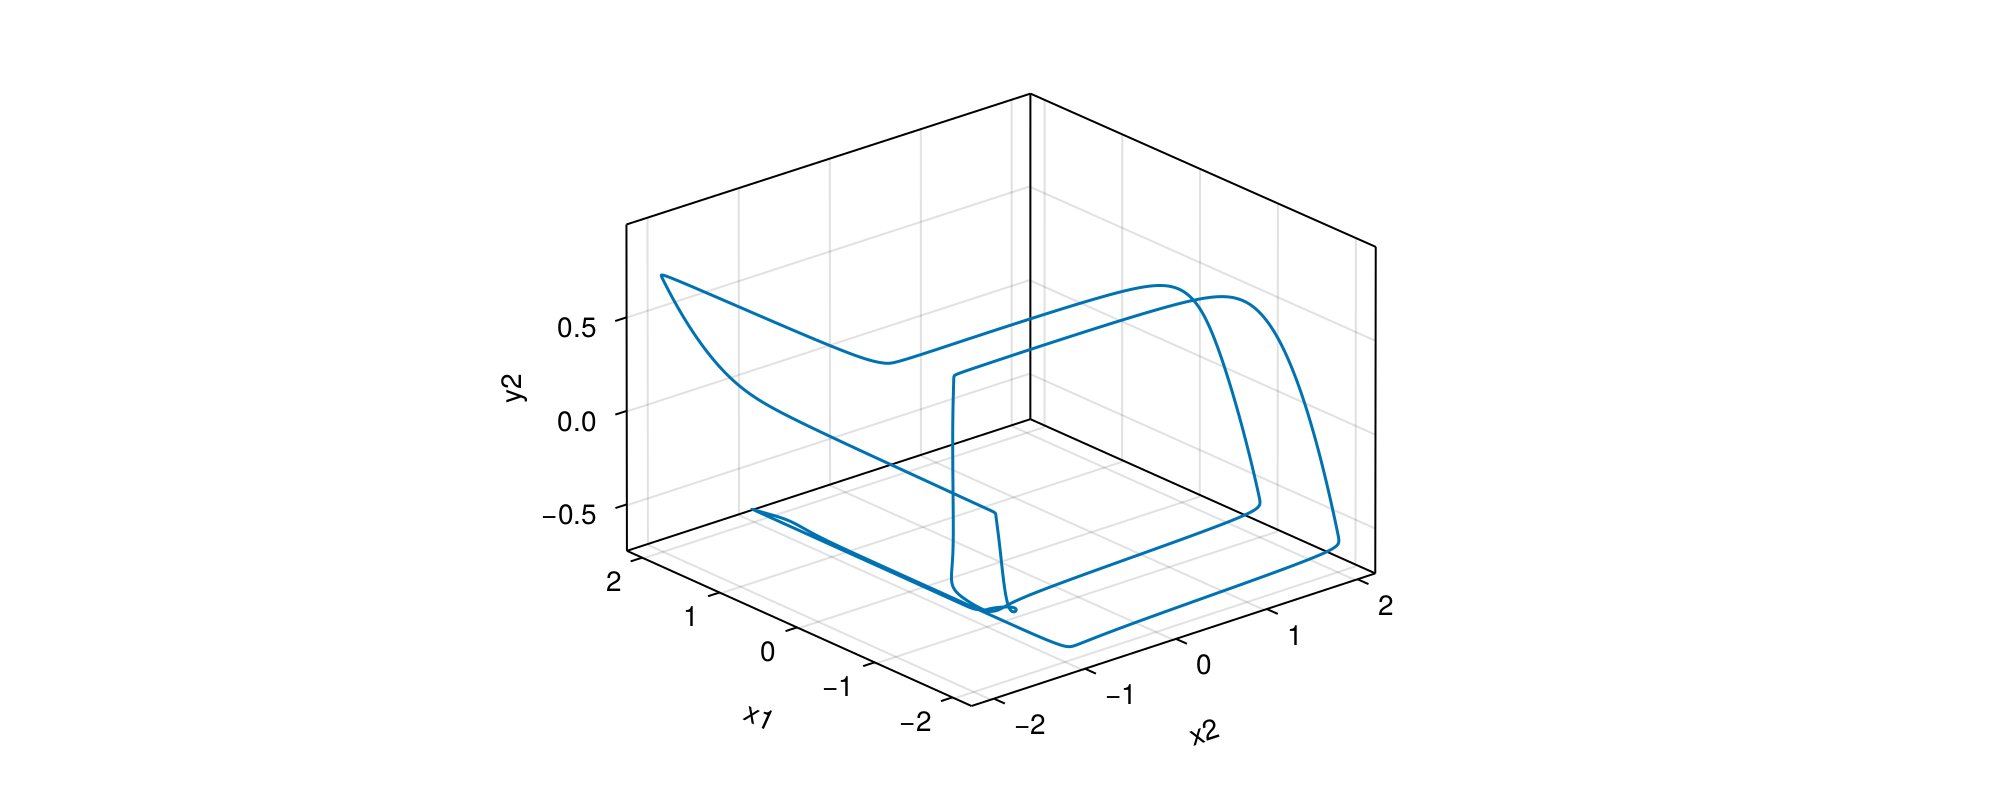

CairoMakie.Screen{IMAGE}


In [5]:
tstart = 600000; tend = 800000
f = Figure(size = (1000, 400))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "y2")
lines!(sol[3, tstart:tend], sol[1, tstart:tend], sol[4, tstart:tend])
display(f)